# Single-factor group comparisons
In this notebook, I will test if a certain factor matters for 6-8 different variables. This analysis serves to establish which single factors explain the largest variance in student performance. 

Here are a few factors that can be analyzed, and the reasons for analyzing them:
- `gender`: can highlight any differences in scoring between student genders
- `lunch_type`: this column can serve as a socioeconomic indicator, showing score differences between students of different perceived socioeconomic status 
- `test_prep`: this will help identify any scoring differences between those students who complete test prep 
- `parental_level_of_education`: this column can be used as a metric of parental educational resources available to the child 
- `weekly_study_hours`: the analysis of this column will show if there are any direct differences between the amount of effort and a students scores
- `practice_sport`: will analyze if extracurriculars intervene with academic scoring in any way
- `transport_means`: will show if students facing access issues have any differences in scoring
- `ethnicity`: will show any equity gaps between students of different ethnic groups

In [65]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# importing the cleaned dataset as a DataFrame
df = pd.read_csv('ExpandedScoresData_Cleaned.csv')

In [67]:
# Checking the data to ensure it's loaded correctly
df.head()

,gender,ethnicity,parental_education,lunch_type,test_prep,parent_marital_status,practice_sports,first_child,num_siblings,transport_means,weekly_study_hours,math_score,reading_score,writing_score,avg_score
0,female,unknown,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,72.000000
1,female,group C,some college,standard,unknown,married,sometimes,yes,0.0,unknown,5 - 10,69,90,88,82.333333
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90.333333
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,unknown,5 - 10,45,56,42,47.666667
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,76.333333


The first comparison will be across across the `lunch_type` category. This column can be used to inspect any differences due to socioeconomic status. 

In [68]:
score_columns = ['math_score', 'reading_score', 'writing_score', 'avg_score']
comparison = df.groupby('lunch_type')[score_columns].agg(['mean','count']).round(2)

comparison_t = comparison.T # transpose for easier readability
print(comparison_t)

lunch_type           free/reduced  standard
math_score    mean          58.86     70.71
              count      10736.00  19905.00
reading_score mean          64.19     72.18
              count      10736.00  19905.00
writing_score mean          62.65     71.53
              count      10736.00  19905.00
avg_score     mean          61.90     71.47
              count      10736.00  19905.00


The table above indicates there is roughly a 10 point difference between students who have a standard lunch vs those who have a free/reduced lunch. The difference in average mean confirms this difference. 

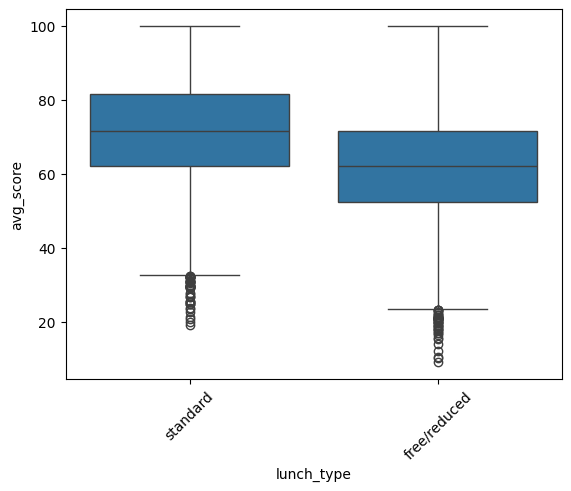

In [69]:
sns.boxplot(data=df, x='lunch_type', y='avg_score')
plt.xticks(rotation=45)
plt.show()

This boxplot is representative of the findings from the table above. The upper quartile for students who have a free/reduced lunch is similar to the median of students who have a standard lunch.

In [70]:
lunch_means = comparison.xs('mean', level=1, axis=1)
lunch_gap = lunch_means.loc['standard'] - lunch_means.loc['free/reduced']
print("Gaps in scores by lunch type:\n", lunch_gap)

Gaps in scores by lunch type:
 math_score       11.85
reading_score     7.99
writing_score     8.88
avg_score         9.57
dtype: float64


The table above qauntifies the gap between students of two different lunch types. This shows the exact average difference at 9.57 points, which confirms findings from the boxplot and initial table above. Based on these findings, it can be confirmed that `lucnh_type`. which serves as a measure of student socioeconomic status, can be a major factor in student scores. In future analysis, this difference can be quantified. 

A similar analysis will be conducted on several different categorical columns. To simplify the process of analyzing the means, gap and creating a boxplot, a function can be used. This function will only compare the difference between the lowest and highest scoring categories, so the most influential categories can be identified. The function below also includes a reference category parameter to pass a specific reference category to compare if needed. 

In [95]:
def analyze_factor(df, factor_col, score_cols, ref_category=None):
    # get the groups means and counts
    comparison = df.groupby(factor_col)[score_cols].agg(['mean','count']).round(2)
    print(f"\n=== Summary for {factor_col} ===")
    print(comparison.T) #transposed for readability

    #create the boxplot
    sns.boxplot(data=df, x=factor_col, y='avg_score')
    plt.title(f'Average score by {factor_col}')
    plt.xticks(rotation=45)
    plt.show()

    #extracting only the means for gap calculation (one row per category, one column per score)
    means = comparison.xs('mean', level=1, axis=1)

    #identifying the best and worst category based on avg_score
    avg_means = means['avg_score']
    best_cat = avg_means.idxmax()
    worst_cat = avg_means.idxmin()
    best_mean = avg_means.max()
    worst_mean = avg_means.min()
    gap = best_mean - worst_mean

    print(f"\nBest {factor_col}: {best_cat} ({best_mean:.2f})")
    print(f"Worst {factor_col}: {worst_cat} ({worst_mean:.2f})")
    print(f"Gap between best and worst in avg_score: {gap:.2f} points")

    # if a reference category is provided, gaps can be computed from that reference
    if ref_category is not None and ref_category in avg_means.index:
        ref_gaps = means.loc[ref_category] - means
        print(f"\nGaps v reference '{ref_category}':")
        print(ref_gaps)

    return {
        'comparison': comparison,
        'best_category': best_cat,
        'worst_category': worst_cat,
        'gap': gap,
        'means': means
    }


# creating a dictionary to store results
factor_results = {}
                


=== Summary for parental_education ===
parental_education   associate's degree  bachelor's degree  high school  \
math_score    mean                68.37              70.47        64.44   
              count             5550.00            3386.00      5687.00   
reading_score mean                71.12              73.06        67.21   
              count             5550.00            3386.00      5687.00   
writing_score mean                70.30              73.33        65.42   
              count             5550.00            3386.00      5687.00   
avg_score     mean                69.93              72.29        65.69   
              count             5550.00            3386.00      5687.00   

parental_education   master's degree  some college  some high school  unknown  
math_score    mean             72.34         66.39             62.58    66.65  
              count          2023.00       6633.00           5517.00  1845.00  
reading_score mean             75.83        

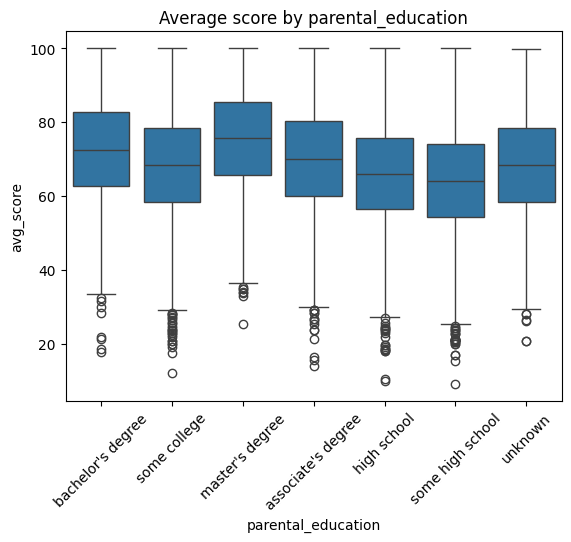


Best parental_education: master's degree (74.84)
Worst parental_education: some high school (63.91)
Gap between best and worst in avg_score: 10.93 points


In [96]:
factor_results['parental_education'] = analyze_factor(df, 'parental_education', score_columns)

From the analysis above, it can be seen that the level of parental education can have a significant difference in student scores, with the largest difference in means seen beteween a masters degree and some form of high school (almost 10 points). Students with parents who have an associates, bachelors or masters degrees tend to score higher than those without. This metric plays a significant role in student scores and will be analyzed further in the future. 


=== Summary for test_prep ===
test_prep            completed      none  unknown
math_score    mean       69.55     64.95    66.89
              count    9955.00  18856.00  1830.00
reading_score mean       73.73     67.05    69.66
              count    9955.00  18856.00  1830.00
writing_score mean       74.70     65.09    68.50
              count    9955.00  18856.00  1830.00
avg_score     mean       72.66     65.70    68.35
              count    9955.00  18856.00  1830.00


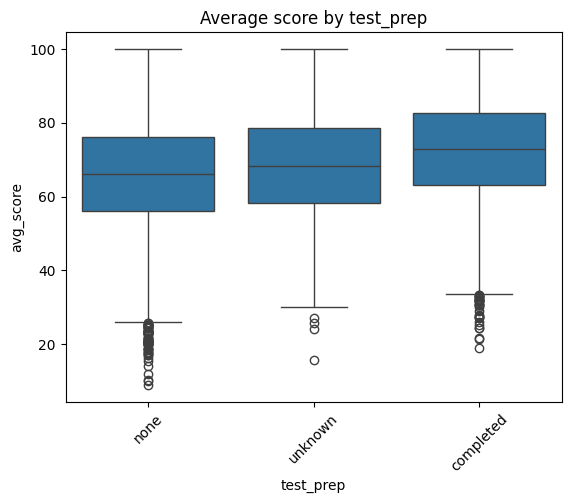


Best test_prep: completed (72.66)
Worst test_prep: none (65.70)
Gap between best and worst in avg_score: 6.96 points


In [97]:
factor_results['test_prep'] = analyze_factor(df, 'test_prep', score_columns)

There is a difference of about 10 points in students who have completed test prep vs those who have not. This is a significant metric and can be explored in further analysis. 


=== Summary for weekly_study_hours ===
weekly_study_hours     5 - 10      < 5     > 10  unknown
math_score    mean      66.87    64.58    68.70    66.66
              count  16246.00  8238.00  5202.00   955.00
reading_score mean      69.66    68.18    70.37    69.55
              count  16246.00  8238.00  5202.00   955.00
writing_score mean      68.64    67.09    69.78    68.77
              count  16246.00  8238.00  5202.00   955.00
avg_score     mean      68.39    66.62    69.61    68.33
              count  16246.00  8238.00  5202.00   955.00


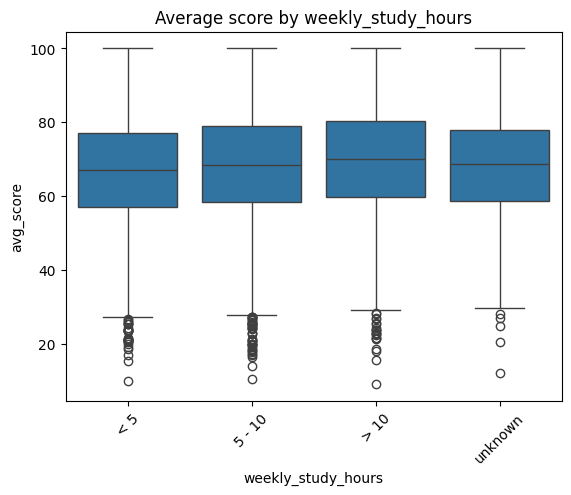


Best weekly_study_hours: > 10 (69.61)
Worst weekly_study_hours: < 5 (66.62)
Gap between best and worst in avg_score: 2.99 points


In [98]:
factor_results['weekly_study_hours'] = analyze_factor(df, 'weekly_study_hours', score_columns)

Here, there is some difference between the students who study more than 10 hours per week versus those who study less than 5 hours a week, standing at roughly 3 points. While this is a noticeable difference, it is not as significant as parental level of education or lunch type. This shows there's a difference in score based on the effort level of a student. 


=== Summary for practice_sports ===
practice_sports        never  regularly  sometimes  unknown
math_score    mean     64.17      67.84      66.27    66.64
              count  4004.00   10793.00   15213.00   631.00
reading_score mean     68.34      69.94      69.24    69.59
              count  4004.00   10793.00   15213.00   631.00
writing_score mean     66.52      69.60      68.07    68.52
              count  4004.00   10793.00   15213.00   631.00
avg_score     mean     66.34      69.13      67.86    68.25
              count  4004.00   10793.00   15213.00   631.00


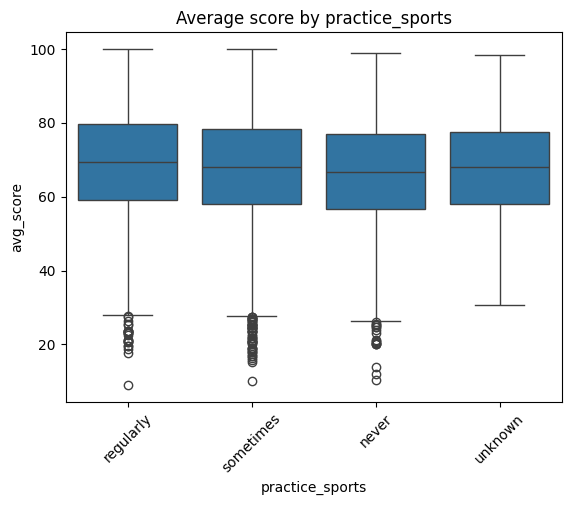


Best practice_sports: regularly (69.13)
Worst practice_sports: never (66.34)
Gap between best and worst in avg_score: 2.79 points


In [99]:
factor_results['practice_sports'] = analyze_factor(df, 'practice_sports', score_columns)

Student who practice sports tend to have slightly higher scores, than those who do not practice sports at all. Students who sometimes practice sports have slightly higher scores than those who never practice sports. This shows that extracurricular participation may have a positive effect on student scores. The difference in the highest and lowest scores is not as significant here as the previous metrics, but this may be worth exploring, especially with weekly study hours, to see if students who perform better also participate in extracurriculars and spend more time studying. 


=== Summary for ethnicity ===
ethnicity            group A  group B  group C  group D  group E  unknown
math_score    mean     62.99    63.49    64.70    67.67    75.30    66.19
              count  2219.00  5826.00  9212.00  7503.00  4041.00  1840.00
reading_score mean     66.79    67.32    68.44    70.38    74.25    68.92
              count  2219.00  5826.00  9212.00  7503.00  4041.00  1840.00
writing_score mean     65.25    65.90    67.00    70.89    72.68    67.90
              count  2219.00  5826.00  9212.00  7503.00  4041.00  1840.00
avg_score     mean     65.01    65.57    66.71    69.65    74.08    67.67
              count  2219.00  5826.00  9212.00  7503.00  4041.00  1840.00


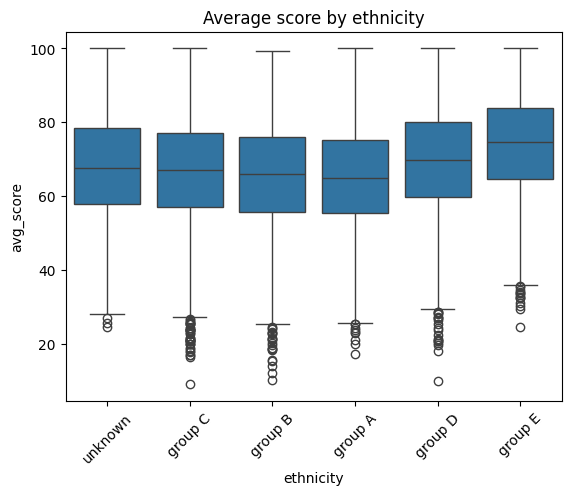


Best ethnicity: group E (74.08)
Worst ethnicity: group A (65.01)
Gap between best and worst in avg_score: 9.07 points


In [100]:
factor_results['ethnicity'] = analyze_factor(df, 'ethnicity', score_columns)

Students of ethnic group E perform significantly better than the rest of the group, with averages almost 5 points higher than the following group. There is also a noticeable difference between the highest and lowest performing groups at just over 9 points. The relationship between scores and ethnic group will be explored further, as this category seems to have a significant effect on student scores. 


=== Summary for transport_means ===
transport_means       private  school_bus  unknown
math_score    mean      66.51       66.67    66.13
              count  11362.00    16145.00  3134.00
reading_score mean      69.47       69.45    68.68
              count  11362.00    16145.00  3134.00
writing_score mean      68.51       68.49    67.71
              count  11362.00    16145.00  3134.00
avg_score     mean      68.16       68.20    67.51
              count  11362.00    16145.00  3134.00


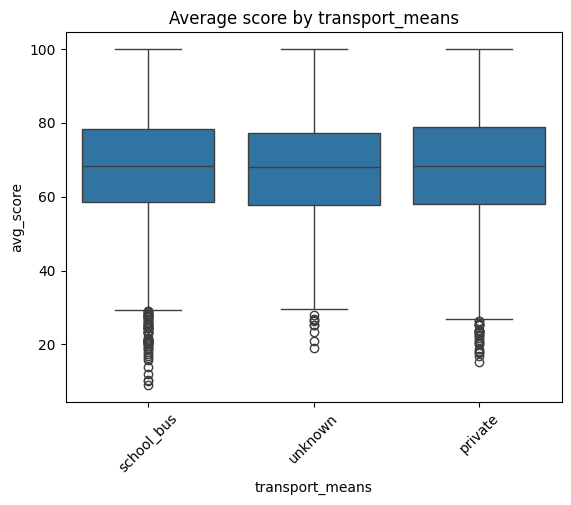


Best transport_means: school_bus (68.20)
Worst transport_means: unknown (67.51)
Gap between best and worst in avg_score: 0.69 points


In [101]:
factor_results['transport_means'] = analyze_factor(df, 'transport_means', score_columns)

The difference in transport means is insignificant across all categories, indiating that access to schooling plays a minor role in how the students perform. This category may not be used in the future, as it does not provide a significant signal for student scoring. 


=== Summary for first_child ===
first_child                no  unknown       yes
math_score    mean      66.25    66.38     66.74
              count  10655.00   904.00  19082.00
reading_score mean      69.13    68.78     69.54
              count  10655.00   904.00  19082.00
writing_score mean      68.21    67.91     68.56
              count  10655.00   904.00  19082.00
avg_score     mean      67.86    67.69     68.28
              count  10655.00   904.00  19082.00


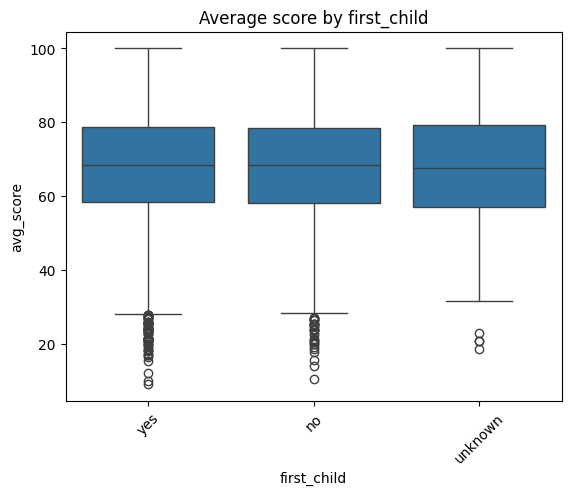


Best first_child: yes (68.28)
Worst first_child: unknown (67.69)
Gap between best and worst in avg_score: 0.59 points


In [102]:
factor_results['first_child'] = analyze_factor(df, 'first_child', score_columns)

Whether or not the student is a first child does not give a strong signal on how the student performs academically. 


=== Summary for num_siblings ===
num_siblings             0.0      1.0      2.0      3.0      4.0      5.0  \
math_score    mean     66.82    66.47    66.51    66.72    66.25    66.63   
              count  3085.00  8217.00  8362.00  6123.00  2941.00  1320.00   
reading_score mean     69.55    69.26    69.43    69.49    69.14    69.45   
              count  3085.00  8217.00  8362.00  6123.00  2941.00  1320.00   
writing_score mean     68.75    68.25    68.44    68.65    68.07    68.28   
              count  3085.00  8217.00  8362.00  6123.00  2941.00  1320.00   
avg_score     mean     68.37    67.99    68.13    68.29    67.82    68.12   
              count  3085.00  8217.00  8362.00  6123.00  2941.00  1320.00   

num_siblings            6.0     7.0  
math_score    mean    65.92   67.62  
              count  302.00  291.00  
reading_score mean    68.80   69.83  
              count  302.00  291.00  
writing_score mean    67.86   68.99  
              count  302.00  291.00  
avg_sc

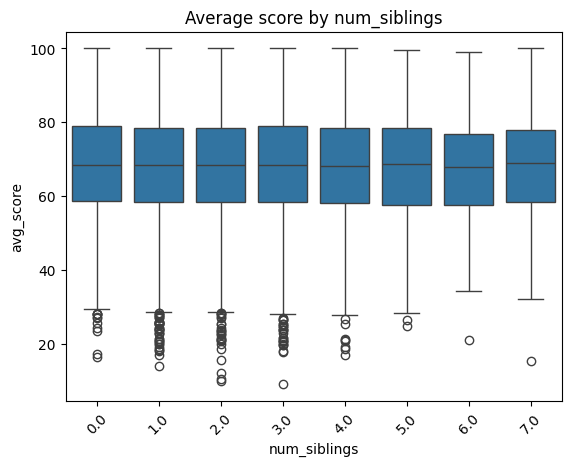


Best num_siblings: 7.0 (68.81)
Worst num_siblings: 6.0 (67.53)
Gap between best and worst in avg_score: 1.28 points


In [93]:
factor_results['num_siblings'] = analyze_factor(df, 'num_siblings', score_columns)


The number of siblings, which can serve as a measure of parental attention per child, also does not give a strong signal for how the student performs. 

9 categorical factors have been analyzed through this notebook, and now they will be compared to find the most significant ones for further analysis. 

In [103]:
%%capture
factor_results['lunch_type'] = analyze_factor(df, 'lunch_type', score_columns);
# running a suppressed output analysis for lunch type. this will simplify comparison against other categories. 

In [106]:
#creating a DataFrame with rankings
ranking_data=[]
for factor, results in factor_results.items():
    ranking_data.append({
        'factor': factor,
        'best_category': results['best_category'],
        'worst_category': results['worst_category'],
        'gap_points': results['gap'],
        'n_categories': len(results['means'])
    })

ranking_df = pd.DataFrame(ranking_data).sort_values('gap_points', ascending=False)
print(ranking_df)

               factor    best_category    worst_category  gap_points  \
0  parental_education  master's degree  some high school       10.93   
7          lunch_type         standard      free/reduced        9.57   
4           ethnicity          group E           group A        9.07   
1           test_prep        completed              none        6.96   
2  weekly_study_hours             > 10               < 5        2.99   
3     practice_sports        regularly             never        2.79   
5     transport_means       school_bus           unknown        0.69   
6         first_child              yes           unknown        0.59   

   n_categories  
0             7  
7             2  
4             6  
1             3  
2             4  
3             4  
5             3  
6             3  


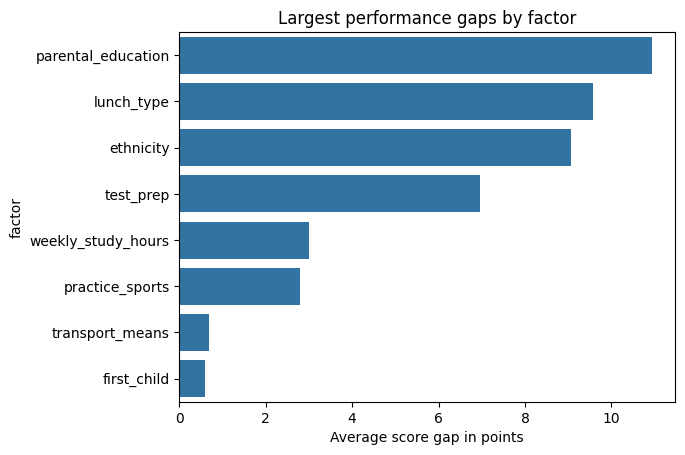

In [111]:
sns.barplot(data=ranking_df, x='gap_points', y='factor')
plt.title('Largest performance gaps by factor')
plt.xlabel('Average score gap in points')
plt.show()

## Notebook Summary

The barplot above ranks factors by the largest average score gap between the best and worst categories

**Key Takeaways**
- `parental_education` shows the largest scoring gap (10.93), confirming that resource access through parents plays a significant role in student scoring. This category spanned across 7 categories and could serve as a strong continuous indicator of parental education. 
- `lunch_type` has a significant gap (9.57) confirming socioeconomic effects on student scoring
- `ethnicity` has a 9.07 point difference between the lowest and highest scoring groups. This spans across 6 categories and can be used as a strong indicator of scoring
- `test_prep` has a 6.96 point difference between students who complete it versus those who do not
- `weekly_study_hours` has a 2.99 point difference spanning across 3 categories. This category can also serve as a continuous indicator of student effort
- `practice_sports` has a 2.79 point difference spanning across 3 categories as well, serving as a continuous indicator of student extracurriculars
- `transport_means` and `first_child` do not show significant differences between categories, and these can be explored in the future if needed. 

Parental education, lunch type, ethnic group and test preperation serve as the strongest indicators for student scoring. These can be explored in further detail to better understand the correlation between scores. 

In the next notebook, the interactions of these effects will be explored. 